In [1]:
#必要な材料をインポート
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
num_filters = 16

x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv = tf.Variable(tf.truncated_normal([5,5,1,num_filters], stddev=0.1))
h_conv = tf.nn.conv2d(x_image, W_conv,
                      strides=[1,1,1,1], padding='SAME')
h_pool =tf.nn.max_pool(h_conv, ksize=[1,2,2,1],
                       strides=[1,2,2,1], padding='SAME')

In [4]:
h_pool_flat = tf.reshape(h_pool, [-1, 14*14*num_filters])

num_units1 = 14*14*num_filters
num_units2 = 1024

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.relu(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

In [5]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())
saver = tf.train.Saver()
# セッションのリストアと、選択
saver.restore(sess, 'mdc_session-4000')

Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from mdc_session-4000


In [7]:
# mnistのイメージを９個まで取り出し
filter_vals, conv_vals, pool_vals = sess.run ([W_conv, h_conv, h_pool], feed_dict={x:mnist.test.images[:9]}) 

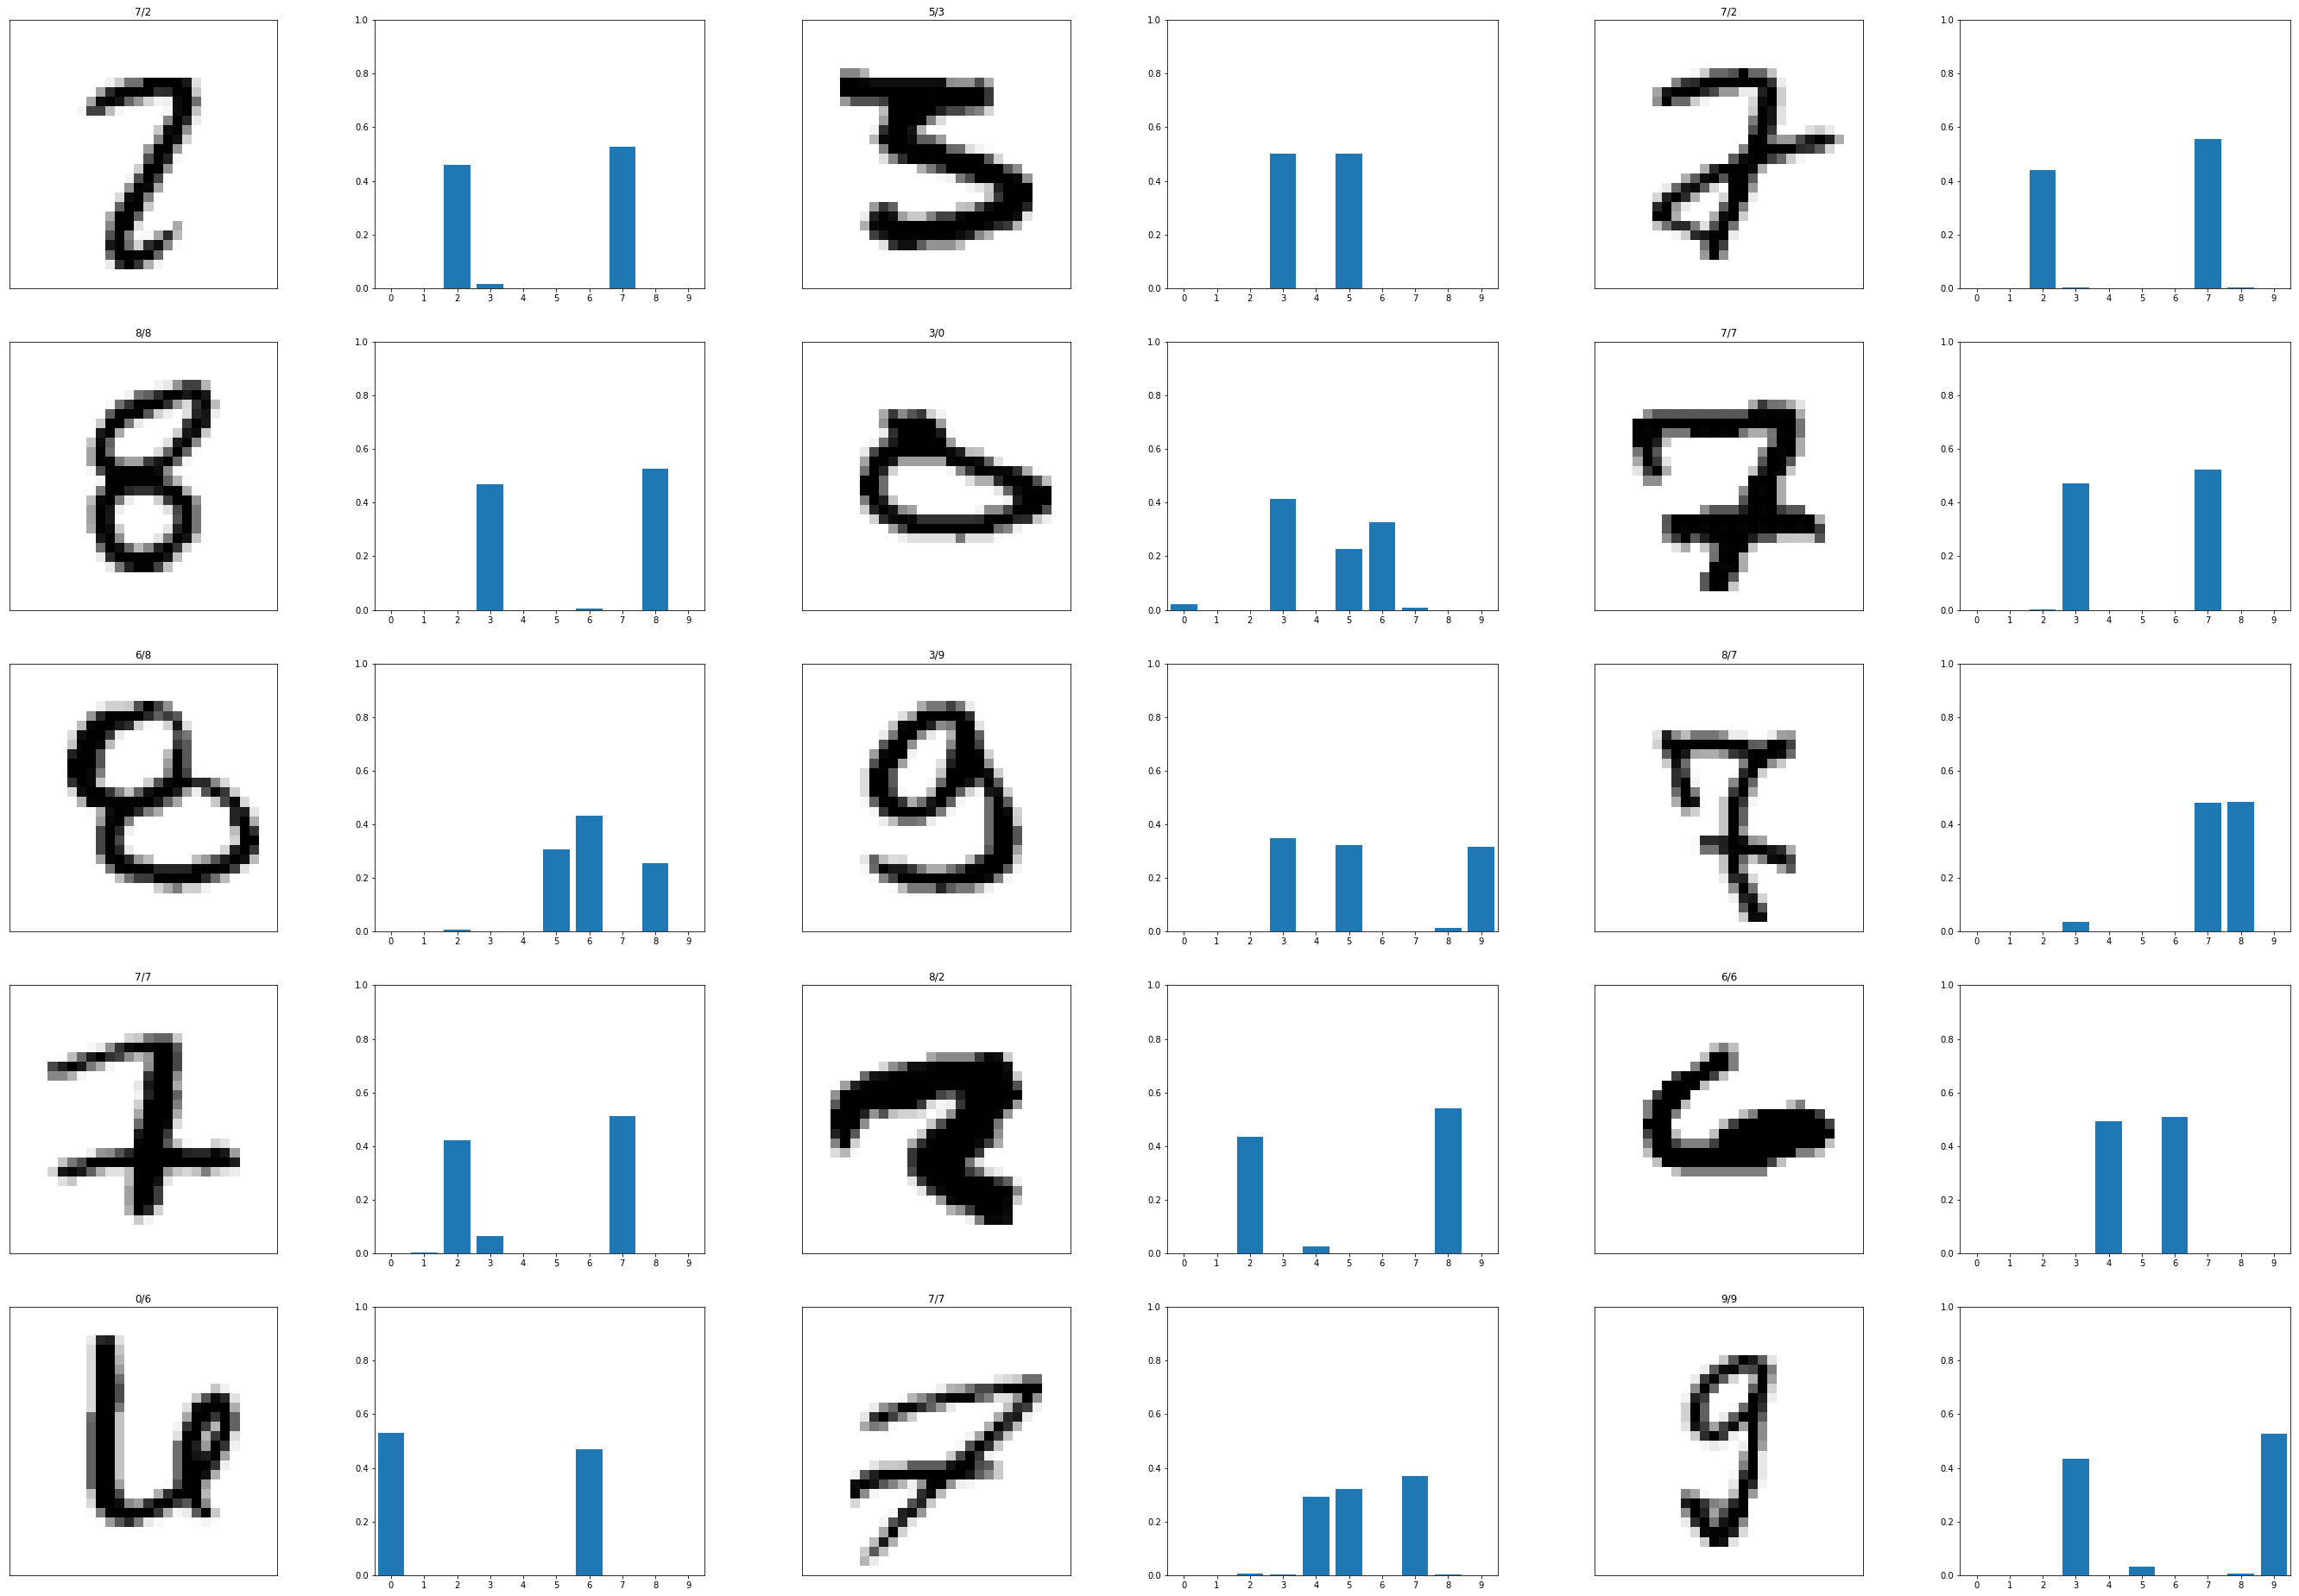

In [68]:
# なぜ正しく分類できなかった？この結果を解析したい。
# 結果を保存するという話があった。保存した値を呼び出してもらって構わない。
# ソフトマックス関数の出力を１０個見て、その最大値を判断している。
# 確率が一番大きなものを判定結果にしているわけで。
# ダントツに大きいのか？それとも僅差なのかを見て見たい。
# 一番大きなpの値、最大のpと、2番目のpの差をある値よりも小さければ。（Dとする。0.1）
# あっていても違っていてもいい。僅差としてなっているのかを見つけてほしい
# 一個ずつ下にどーっとやってもらっても良い。

fig = plt.figure(figsize=(48,40))
c = 0
for (image, label) in zip(mnist.test.images,
                         mnist.test.labels):
    p_val = sess.run(p, feed_dict={x:[image]})
    pred = p_val[0]
    prediction, actual = np.argmax(pred), np.argmax(label)
    sorting = sorted(pred, reverse=True)
    if sorting[0]-sorting[1]<=0.15:
        subplot = fig.add_subplot(6, 6, c*2+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d/%d' % (prediction, actual))
        subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                       cmap = 'gray_r', interpolation='nearest')
        subplot = fig.add_subplot(6, 6, c*2+2)
        subplot.set_xticks(range(10))
        subplot.set_xlim(-0.5,9.5)
        subplot.set_ylim(0,1)
        subplot.bar(range(10), pred)
        c+=1
    if c == 15:
        break